In [4]:
import numpy as np

import plotly.graph_objects as go
from pathlib import Path
def plot_graph(list_x_, list_y_, names, xtitle, ytitle, image_name, mode=['lines+markers'],\
               xrange=[], yrange=[],\
			   dash=['solid', 'dot', 'dash', 'longdash'],\
			   colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ],\
			   marker_size=15,\
			   marker_style = ['circle', 'triangle-up', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ],\
			   width=1000, height=500, path='./'):
	
	list_x, list_y = [], []
	for i,x in enumerate(list_x_):
		y = list_y_[i]
		list_x.append(np.array(x))
		list_y.append(np.array(y))
	if mode == []:
		for i in range(len(list_x)):
			mode.append('lines+markers')
	if xrange == []:
		minx, maxx = [], []
		for i,x in enumerate(list_x):
			minx.append(x.min())
			maxx.append(x.max())
		xrange = [minx, maxx]
	if yrange == []:
		miny, maxy = [], []
		for i,y in enumerate(list_y):
			miny.append(y.min())
			maxy.append(y.max())
		yrange = [miny, maxy]
	figborderlinesize = 0.7
	legborderlinesize = 0.7
	yaxis = dict(
		tickfont = dict(
			family = 'Times New Roman',
			size = 20,
			color = 'black'
		),
		titlefont = dict(
			family = 'Times New Roman',
			size = 25,
			color = 'black'
		),
	)
	xaxis = dict(
		tickfont = dict(
			family = 'Times New Roman',
			size = 20,
			color = 'black'
		),
		titlefont = dict(
			family = 'Times New Roman',
			size = 25,
			color = 'black'
		)
	)

	axis_style = dict(showline=True, gridwidth=1, gridcolor='lightgrey', linewidth=figborderlinesize, linecolor='black', mirror=True, ticks='outside',
					  tickfont = dict(family = 'Times New Roman', size = 20, color = 'black'))
	bg_style = {'plot_bgcolor': 'rgba(255, 255, 255, 1)', 'paper_bgcolor': 'rgba(255, 255, 255, 1)',}


	fig = go.Figure()
	for i,x in enumerate(list_x):
		print('curve number',i)        
		y = list_y[i]
		fig.add_trace(go.Scatter(x=x, y=y, name=names[i],
								 mode=mode[i],
								 marker=dict(
									 size=marker_size,
									 line=dict(
										 color=colors[i],
										 width=1
									 )
								 ),
								 marker_symbol=marker_style[i],
								 line=dict(color=colors[i], width=2, dash=dash[i]),
								 textfont=dict(
									 family="Times New Roman",
									 size=18,
									 color="LightSeaGreen")
								 ))
	fig.update_layout(
		width = width,
		height = height,
		xaxis_title=xtitle,
		yaxis_title=ytitle,
		yaxis = yaxis,
		xaxis = xaxis,
		showlegend=True
	)
	fig.update_layout(bg_style)
	fig.update_xaxes(axis_style)
	fig.update_yaxes(axis_style)
	fig.update_layout(legend=dict(
		# yanchor="bottom",
		# y=0.1,
		# xanchor="left",
		# x=1.01,
		bgcolor="White",
		bordercolor="Black",
		borderwidth=figborderlinesize
	))
	fig.update_layout(
		autosize=False,
		margin=dict(
			l=0,
			r=0,
			b=0,
			t=0,
			pad=0.1
		),
		#     paper_bgcolor="LightSteelBlue",
	)
	fig.update_xaxes(range=xrange)
	fig.update_yaxes(range=yrange)
	fig.show()
	fn = path + image_name
	fig.write_image(str(Path(fn)), engine='kaleido')
	print("Successfully generated:", fn)

# Task 1
Do a study of the effect of the choice of polynomial interpolation points in the interval $[0, 1]$. Use the following three grid distributions of $N+1$ points each for Lagrange interpolation.

> Equispaced: $x_i =\frac{i}{N},$

>Chebyshev: $x_i =\frac12( 1 - \cos(\frac{i\pi}{N})),$

>arc sine points: $x_i =\frac12 + \frac1\pi\sin^{-1}(\frac{2i}{N}-1) $

where $i = 0, . . . , N$ for all these distributions. For each of the following functions:
>i. $(1+x^2)^{-1}$

>ii. $(x-\frac12)^2\mathrm{sign}(x-\frac12)$

>iii. $|x − \frac12|$

>iv. $\sqrt{1 − x^2}$

>v. Heaviside function: ${\begin{cases}0,&x<0;\\1,&x\geqslant 0.\end{cases}}$

>(a) compute polynomial interpolants for all $3$ point sets for $N = 10, 20, 40,$ and $80$
for Lagrange interpolant and for $N = 5, 10, 20,$ and $40$ for Hermite interpolant
and plot it;

>(b) estimate the maximum error each interpolant makes on the entire interval $[0, 1]$;

>(c) plot these errors in log-log scale and estimate the order of convergence of the
error as a function of $N$;

>(d) discuss the effectiveness of the choice for interpolation points;

>(e) compare Lagrange and Hermite interpolation.
For Hermite interpolation, provide derivatives evaluated analytically.

# Define functions and their derivatives

In [5]:
# define functions:
def Runge(x):
    return 1/(1 + x**2)

def mod_sign(x):
    return (x - 0.5)**2*np.sign(x - 0.5)

def mod(x):
    return np.abs(x - 0.5)
    
def sqrt_root(x):
    return np.sqrt(1 - x**2)
    
def heaviside(x):
    return np.heaviside(x, 1)

# define derivative of functions:
def Runge_diff(x):
    return -2*x/(1+x**2)**2

def mod_sign_diff(x):
    return 2*(x-0.5)*np.sign(x-0.5)

def mod_diff(x):
    return np.sign(x-0.5)
    
def sqrt_root_diff(x):
    return -x/np.sqrt(1.0-x**2)
    
def heaviside_diff(x):
    f = heaviside(x)
    return np.gradient(f)

# ill-posed problems
## Condition number:
$$cond(f) = \frac{|x||f'(x)|}{|f(x)|}$$

due to poor mesh, poor numerical algorithm 
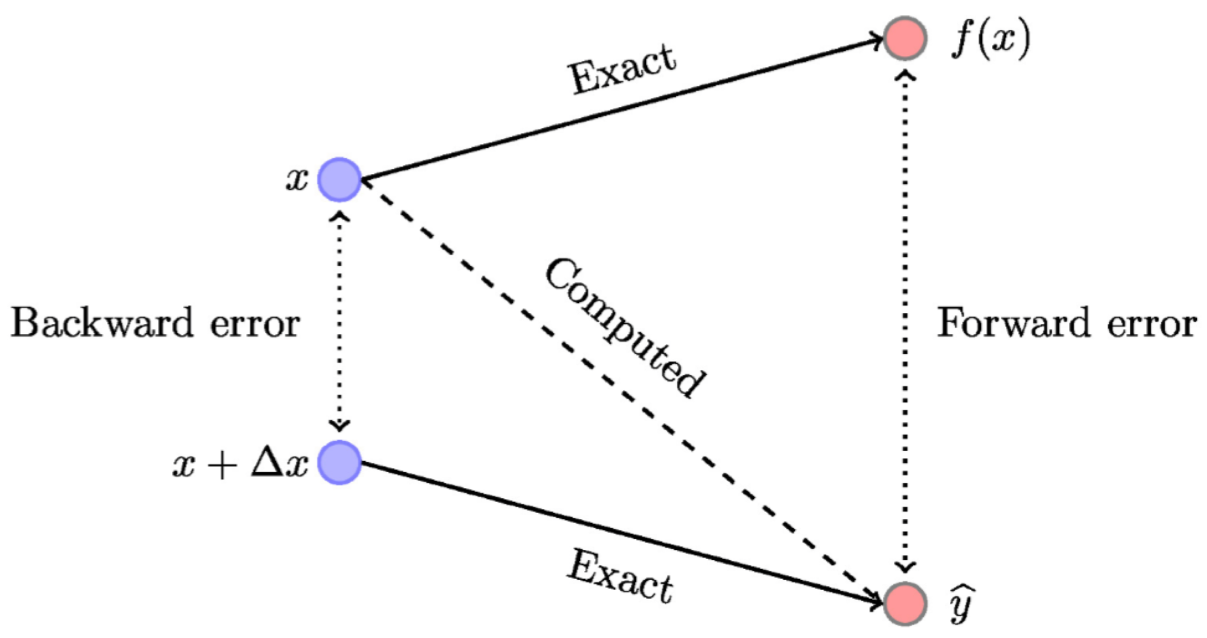
## Condition number for the Runge problem:
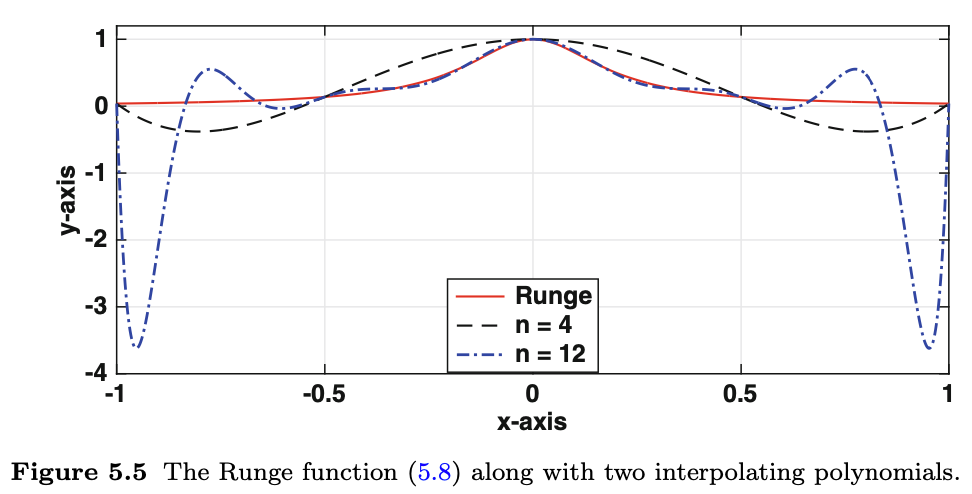

## Condition number for equispaced problem and Chebushev problem
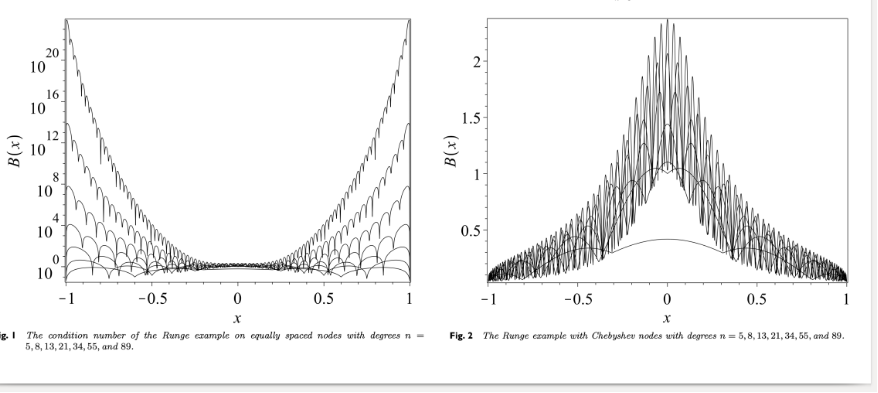

# Define Meshes

In [6]:
def equispaced_mesh(t):
    return t/t.shape

def chebushev_mesh(t):
    return 0.5*(1 - np.cos(t*np.pi/t.shape))

def arcsin_mesh(t):
    return 0.5 + (1/np.pi)*np.arcsin(2*t/t.shape - 1)
                
def Mesh(f_mesh, N):
    t = np.arange(0,N)
    return f_mesh(t)

# Mesh Generation

In [17]:
N = 40
list_x, list_y = [], []

# f = Runge
# df = Runge_diff

f = mod
# Generation of equispaced mesh
xi_eq = Mesh(equispaced_mesh, N)
fi_eq = f(xi_eq)
list_x.append(xi_eq)
list_y.append(np.zeros(N))

# Generation of Chebushev mesh
xi_cheb = Mesh(chebushev_mesh, N)
fi_cheb = f(xi_cheb)
list_x.append(xi_cheb)
list_y.append(np.ones(N))

# Generation of arcsin mesh
xi_arc = Mesh(arcsin_mesh, N)
fi_arc = f(xi_arc)
list_x.append(xi_arc)
list_y.append(2*np.ones(N))

fn = "meshes.pdf"
plot_graph(list_x, list_y, names=['equispaced', 'chebushev', 'arcsin'], xtitle='x', ytitle='-', \
            image_name=fn, mode=['markers','markers','markers'],\
#             xrange=[0,4], yrange=[0,0.45],\
#             dash=['solid', 'solid', 'solid', 'dash', 'dash', 'dash', 'dash', 'dash'],\
            colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'indigo', 'aqua', 'goldenrod', 'black', 'pink'],\
            marker_size=10,\
            marker_style = ['circle', 'triangle-up', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin', 'circle', 'triangle-up', 'triangle-down' ],\
            width=1000, height=500, path="./")

curve number 0
curve number 1
curve number 2


Successfully generated: ./meshes.pdf


# Some hints:

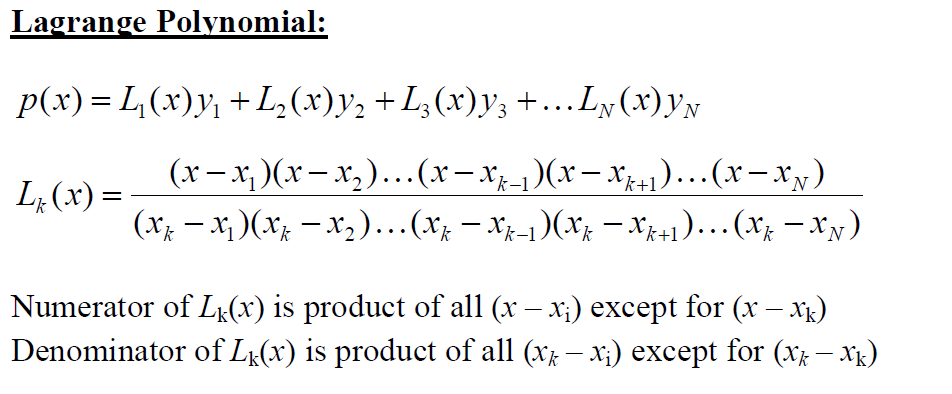

In [18]:
class LagrangePoly:

    def __init__(self, X, Y):
        self.n = X.shape[0]
        self.X = X
        self.Y = Y

    def basis(self, x, j):
        b = [(x-self.X[m])/(self.X[j] - self.X[m]) 
            for m in range(self.n) if m != j]
        return np.prod(b, axis=0)

    def interpolate(self, x):
        b = [self.Y[j]*self.basis(x,j) for j in range(self.n)]
        return np.sum(b, axis=0)

In [19]:
list_y = []
list_y.append(fi_eq)
list_y.append(fi_cheb)
list_y.append(fi_arc)

fn = "fun.pdf"
plot_graph(list_x, list_y, names=['equispaced', 'chebushev', 'arcsin'], xtitle='x', ytitle='-', \
            image_name=fn, mode=['markers','markers','markers'],\
#             xrange=[0,4], yrange=[0,0.45],\
#             dash=['solid', 'solid', 'solid', 'dash', 'dash', 'dash', 'dash', 'dash'],\
            colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'indigo', 'aqua', 'goldenrod', 'black', 'pink'],\
            marker_size=10,\
            marker_style = ['circle', 'triangle-up', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin', 'circle', 'triangle-up', 'triangle-down' ],\
            width=1000, height=500, path="./")

curve number 0
curve number 1
curve number 2


Successfully generated: ./fun.pdf


In [20]:
list_x, list_y = [], []
M = 1000
x = np.linspace(0, 1, M)
list_x.append(x)
list_x.append(x)
list_x.append(x)

# Check lagrange polynomials... for different meshes
# ....
lagrange = LagrangePoly(xi_eq, fi_eq)
list_y.append(lagrange.interpolate(x))

lagrange = LagrangePoly(xi_cheb, fi_cheb)
list_y.append(lagrange.interpolate(x))

lagrange = LagrangePoly(xi_arc, fi_arc)
list_y.append(lagrange.interpolate(x))

fn = "fun_lagr.pdf"
plot_graph(list_x, list_y, names=['equispaced', 'chebushev', 'arcsin'], xtitle='x', ytitle='-', \
            image_name=fn, mode=['markers','markers','markers'],\
#             xrange=[0,4], yrange=[0,0.45],\
#             dash=['solid', 'solid', 'solid', 'dash', 'dash', 'dash', 'dash', 'dash'],\
            colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'indigo', 'aqua', 'goldenrod', 'black', 'pink'],\
            marker_size=10,\
            marker_style = ['circle', 'triangle-up', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin', 'circle', 'triangle-up', 'triangle-down' ],\
            width=1000, height=500, path="./")

curve number 0
curve number 1
curve number 2


Successfully generated: ./fun_lagr.pdf
